# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [2]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [3]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

** Read in the csv file as a dataframe called df **

In [5]:
df = pd.read_csv("/kaggle/input/montcoalert/911.csv")

** Check the info() of the df **

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


** Check the head of df **

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [19]:
df["zip"].nlargest(5)

66737     77316.0
25529     36107.0
383237    23005.0
557265    23005.0
408858    21701.0
Name: zip, dtype: float64

** What are the top 5 townships (twp) for 911 calls? **

In [23]:
frequency = df["twp"].value_counts()
frequency.nlargest(5)

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [11]:
df["title"].nunique()

148

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [26]:
def extract_prefix(title):
    return title.split(': ')[0]

# Apply the function to create a new column 'prefix'
df['reason'] = df['title'].apply(lambda x: extract_prefix(x))

** What is the most common Reason for a 911 call based off of this new column? **

In [28]:
frequency = df["reason"].value_counts()
frequency.nlargest()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

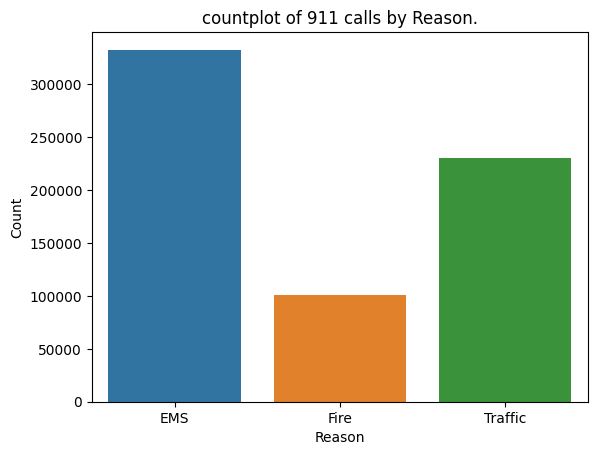

In [29]:
import seaborn as sns
sns.countplot(data=df, x='reason')
plt.title('countplot of 911 calls by Reason.')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [36]:
df["timeStamp"].dtype

dtype('O')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [38]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [40]:
def extract_hour(timestamp):
    return timestamp.hour

def extract_month(timestamp):
    return timestamp.month

def extract_day_of_week(timestamp):
    return timestamp.strftime('%A')


df['hour'] = df['timeStamp'].apply(extract_hour)
df['month'] = df['timeStamp'].apply(extract_month)
df['dayOfWeek'] = df['timeStamp'].apply(extract_day_of_week)

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [41]:
df['dayOfWeek']

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
            ...    
663517    Wednesday
663518    Wednesday
663519    Wednesday
663520    Wednesday
663521    Wednesday
Name: dayOfWeek, Length: 663522, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

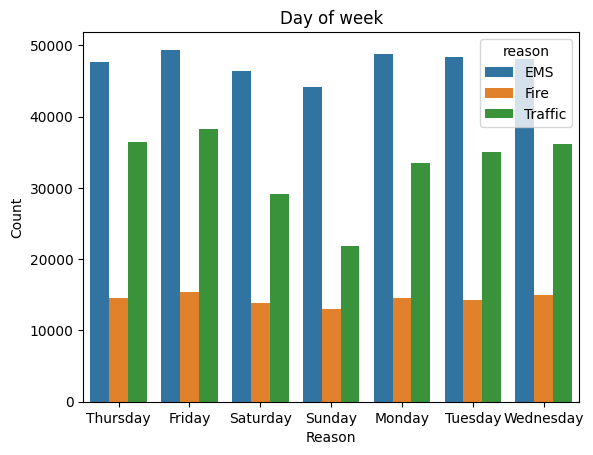

In [43]:
sns.countplot(data=df, x='dayOfWeek', hue = "reason")
plt.title('Day of week')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

**Now do the same for Month:**

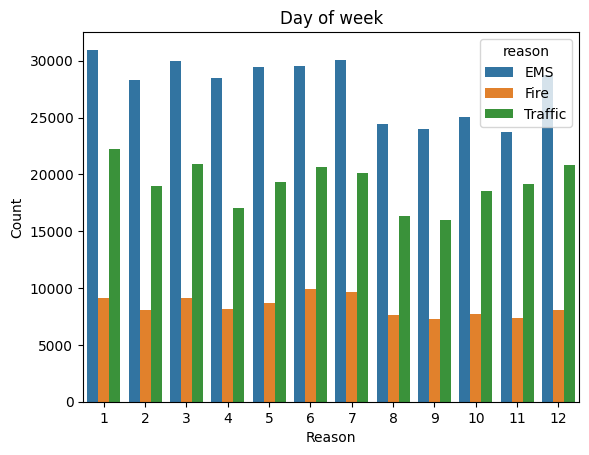

In [44]:
sns.countplot(data=df, x='month', hue = "reason")
plt.title('Day of week')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.show()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [47]:
byMonth = df.groupby('month').count()

byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,prefix,reason,hour,dayOfWeek
month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='month'>

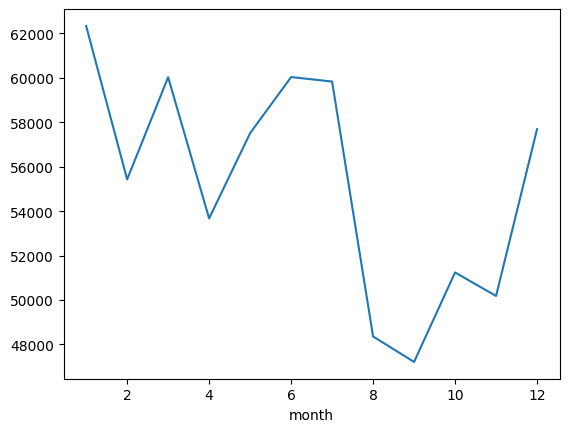

In [71]:
byMonth['timeStamp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

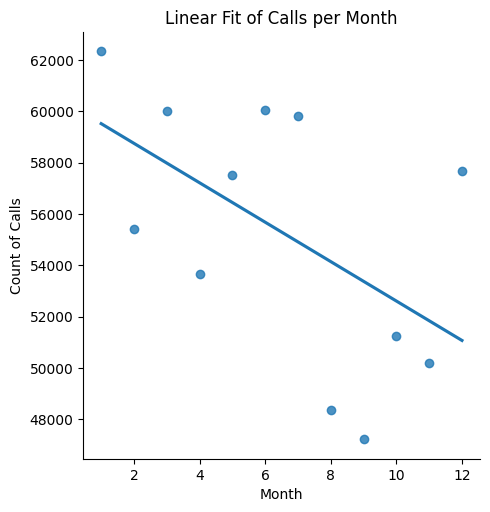

In [67]:
byMonth_reset['month'] = byMonth_reset['month'].astype(int)


sns.lmplot(x='month', y='timeStamp', data=byMonth_reset, ci=None)


plt.title('Linear Fit of Calls per Month')
plt.xlabel('Month')
plt.ylabel('Count of Calls')

# Show the plot
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [69]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

df["date"]

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

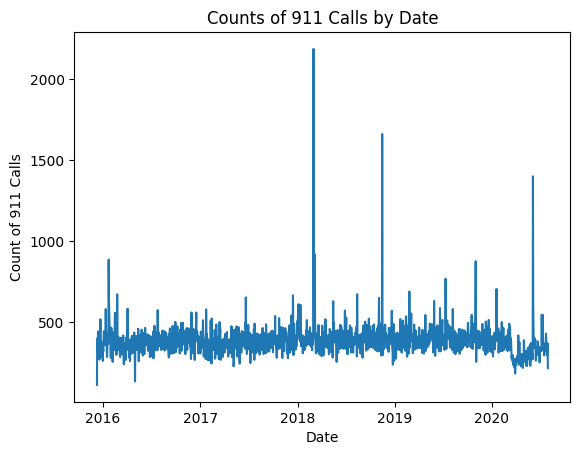

In [94]:
calls_by_date = df.groupby('date').size()

calls_by_date.plot(kind='line')

# Set the title and labels
plt.title('Counts of 911 Calls by Date')
plt.xlabel('Date')
plt.ylabel('Count of 911 Calls')

plt.show()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

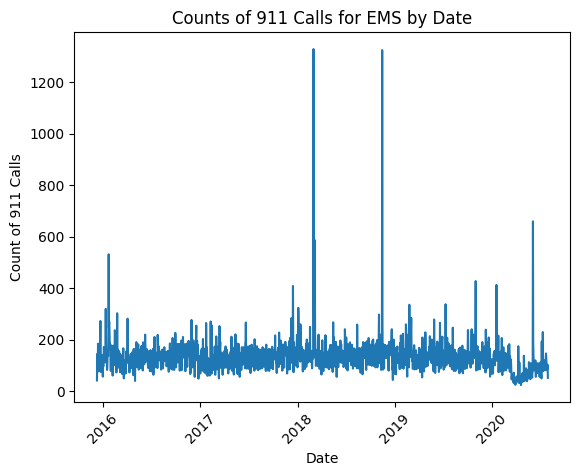

In [80]:
ems_df = df[df['reason'] == 'Traffic']

ems_calls_by_date = ems_df.groupby('date').size()

ems_calls_by_date.plot(kind='line')

plt.title('Counts of 911 Calls for EMS by Date')
plt.xlabel('Date')
plt.ylabel('Count of 911 Calls')
plt.xticks(rotation=45)

plt.show()

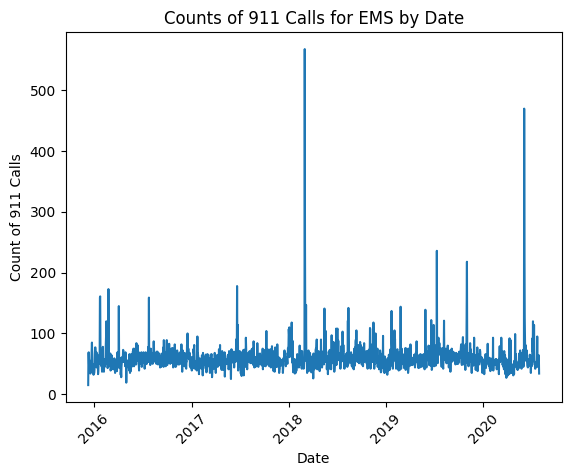

In [79]:
ems_df = df[df['reason'] == 'Fire']

ems_calls_by_date = ems_df.groupby('date').size()

ems_calls_by_date.plot(kind='line')

plt.title('Counts of 911 Calls for EMS by Date')
plt.xlabel('Date')
plt.ylabel('Count of 911 Calls')
plt.xticks(rotation=45)

plt.show()

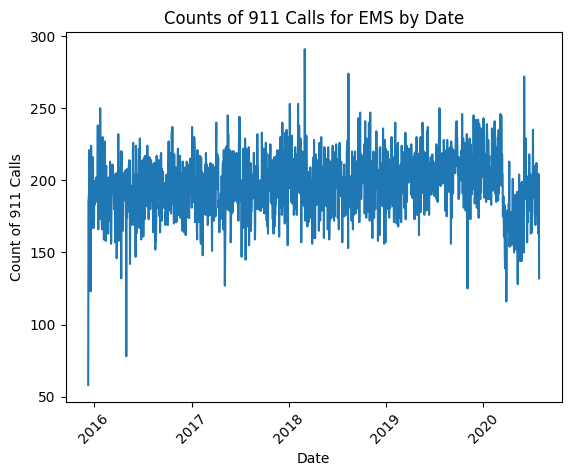

In [78]:
ems_df = df[df['reason'] == 'EMS']

ems_calls_by_date = ems_df.groupby('date').size()

ems_calls_by_date.plot(kind='line')

plt.title('Counts of 911 Calls for EMS by Date')
plt.xlabel('Date')
plt.ylabel('Count of 911 Calls')
plt.xticks(rotation=45)

plt.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [81]:
calls_by_day_hour = df.groupby(['dayOfWeek', 'hour']).size()

# Pivot the 'Hour' index level to columns
calls_by_day_hour = calls_by_day_hour.unstack()

print(calls_by_day_hour)

hour         0     1     2     3     4     5     6     7     8     9   ...  \
dayOfWeek                                                              ...   
Friday     1983  1635  1449  1296  1339  1639  2670  4143  5018  5288  ...   
Monday     1894  1571  1368  1272  1336  1844  2675  4430  5504  5724  ...   
Saturday   2447  2059  1883  1592  1451  1580  1880  2489  3457  4315  ...   
Sunday     2424  2135  1946  1614  1471  1488  1726  2408  3001  3728  ...   
Thursday   1731  1408  1426  1236  1293  1775  2816  4432  5297  5412  ...   
Tuesday    1720  1459  1322  1213  1247  1741  2784  4425  5634  5566  ...   
Wednesday  1664  1484  1259  1265  1128  1609  2668  4644  5469  5444  ...   

hour         14    15    16    17    18    19    20    21    22    23  
dayOfWeek                                                              
Friday     6394  7040  7065  7113  5668  5056  4375  3913  3422  2834  
Monday     5713  6289  6346  6408  5441  4488  3823  3254  2658  2072  
Saturday 

** Now create a HeatMap using this new DataFrame. **

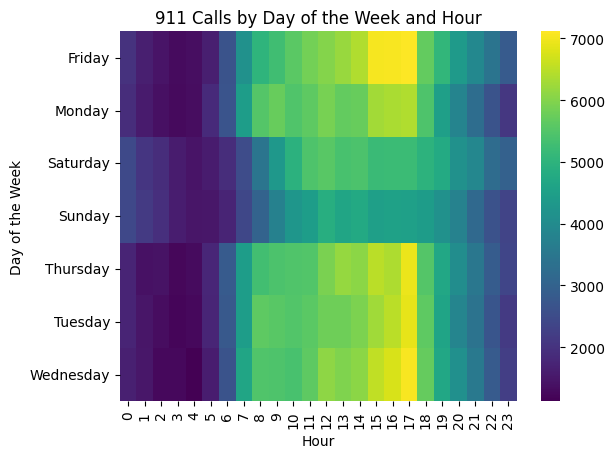

In [87]:
sns.heatmap(calls_by_day_hour, cmap='viridis')

plt.title('911 Calls by Day of the Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')

plt.show()

** Now create a clustermap using this DataFrame. **

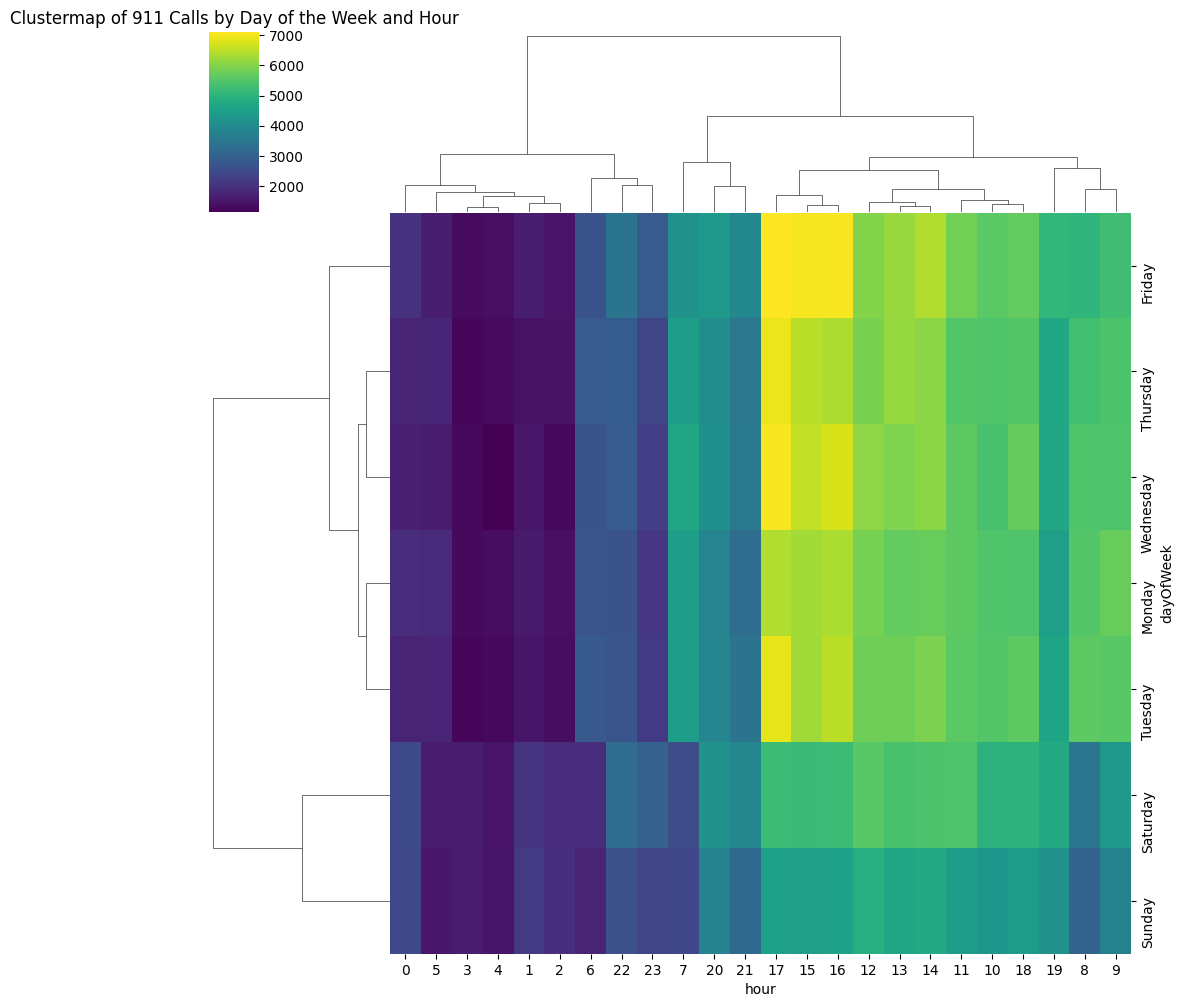

In [89]:
sns.clustermap(calls_by_day_hour, cmap='viridis')

plt.title('Clustermap of 911 Calls by Day of the Week and Hour')

plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [91]:
calls_by_day_month = df.groupby(['dayOfWeek', 'month']).size()

# Pivot the 'Hour' index level to columns
calls_by_day_month = calls_by_day_month.unstack()

calls_by_day_month.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
dayOfWeek,,,,,,,,,,,,
Friday,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Monday,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Saturday,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sunday,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thursday,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


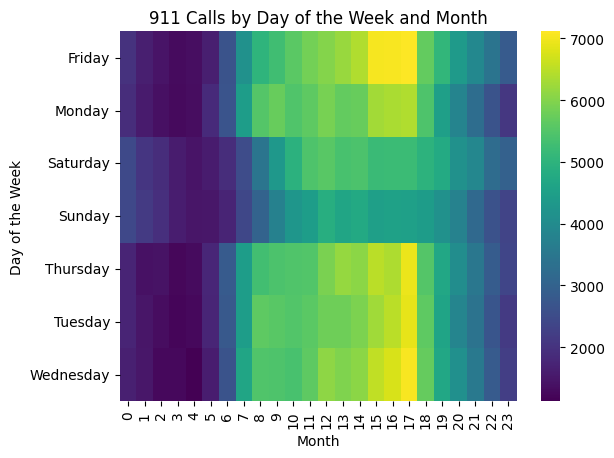

In [92]:
sns.heatmap(calls_by_day_hour, cmap='viridis')

plt.title('911 Calls by Day of the Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of the Week')

plt.show()

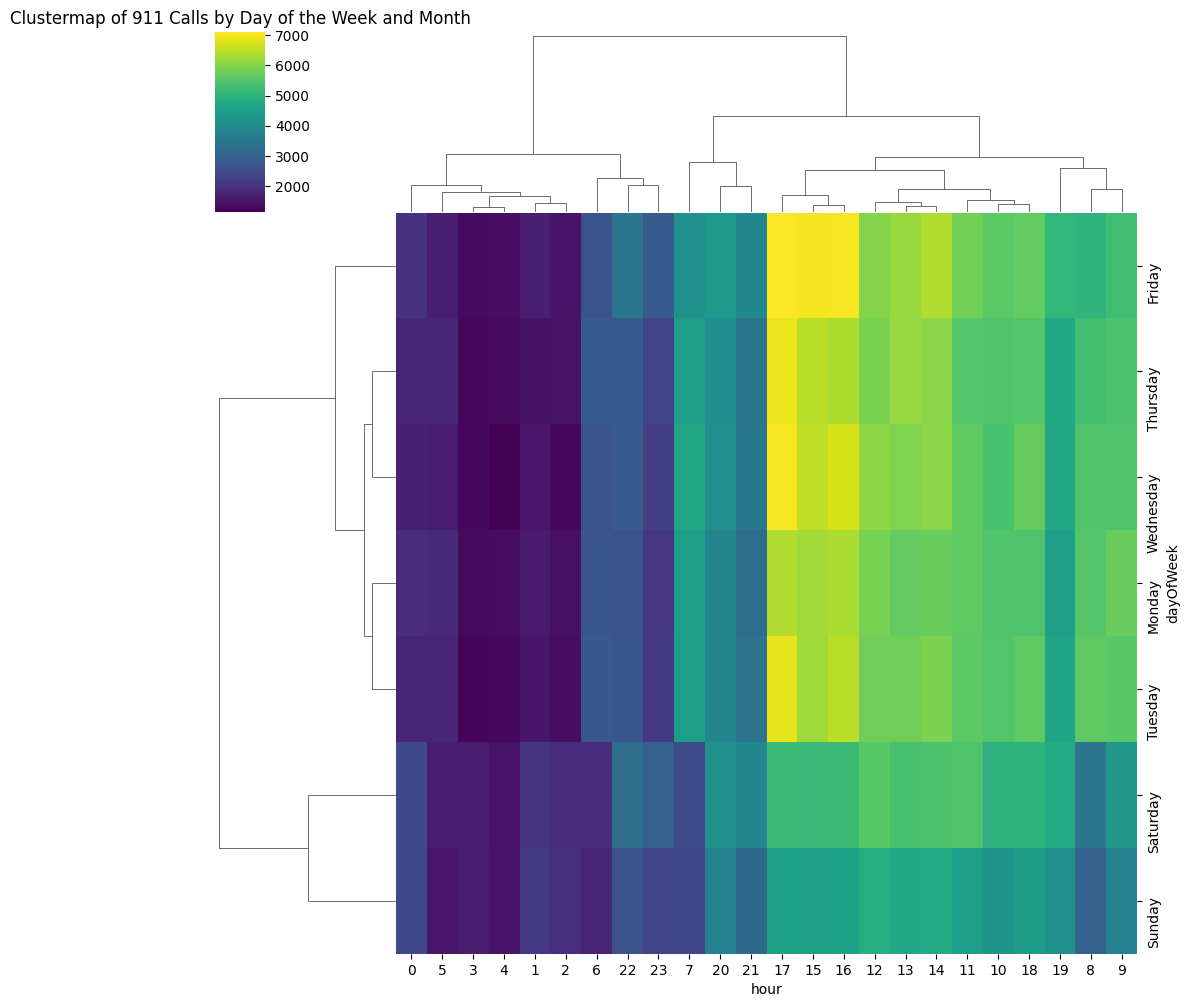

In [93]:
sns.clustermap(calls_by_day_hour, cmap='viridis')

plt.title('Clustermap of 911 Calls by Day of the Week and Month')

plt.show()

**Continue exploring the Data however you see fit!**
# Great Job!